In [ ]:
import pandas as pd
from google.colab import drive
from IPython.display import Image
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [ ]:
articles = pd.read_csv("articles.csv", dtype={'article_id': 'str'})
customers = pd.read_csv("customers.csv")
sample_submission = pd.read_csv("sample_submission.csv")
transactions = pd.read_csv("transactions_train.csv", dtype={'article_id': 'str'})

### Checking the size of the datasets

In [ ]:
print("articles", articles.shape)
print("customers", customers.shape)
print("sample_submission", sample_submission.shape)
print("transactions_train", transactions.shape)

articles (105542, 25)
customers (1371980, 7)
sample_submission (1371980, 2)
transactions_train (31788324, 5)


### Univariate Aanalysis

In [ ]:
articles.describe()

,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
count,105542.000000,105542.000000,1.055420e+05,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,698424.563378,234.861875,1.009515e+06,32.233822,3.206183,7.807972,4532.777833,3.171534,42.664219,1010.438290
std,128462.384432,75.049308,2.241359e+04,28.086154,1.563839,5.376727,2712.692011,4.353234,23.260105,6.731023
min,108775.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000
25%,616992.500000,252.000000,1.010008e+06,9.000000,2.000000,4.000000,1676.000000,1.000000,20.000000,1005.000000
50%,702213.000000,259.000000,1.010016e+06,14.000000,4.000000,5.000000,4222.000000,2.000000,46.000000,1009.000000
75%,796703.000000,272.000000,1.010016e+06,52.000000,4.000000,11.000000,7389.000000,4.000000,61.000000,1017.000000
max,959461.000000,762.000000,1.010029e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000


In [ ]:
customers.describe()

,FN,Active,age
count,476930.0,464404.0,1.356119e+06
mean,1.0,1.0,3.638696e+01
std,0.0,0.0,1.431363e+01
min,1.0,1.0,1.600000e+01
25%,1.0,1.0,2.400000e+01
50%,1.0,1.0,3.200000e+01
75%,1.0,1.0,4.900000e+01
max,1.0,1.0,9.900000e+01


In [ ]:
transactions.describe()

,price,sales_channel_id
count,3.178832e+07,3.178832e+07
mean,2.782927e-02,1.704028e+00
std,1.918113e-02,4.564786e-01
min,1.694915e-05,1.000000e+00
25%,1.581356e-02,1.000000e+00
50%,2.540678e-02,2.000000e+00
75%,3.388136e-02,2.000000e+00
max,5.915254e-01,2.000000e+00


Number of unique values

In [ ]:
articles.nunique()

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

In [ ]:
customers.nunique()

customer_id               1371980
FN                              1
Active                          1
club_member_status              3
fashion_news_frequency          4
age                            84
postal_code                352899
dtype: int64

In [ ]:
transactions.nunique()

t_dat                   734
customer_id         1362281
article_id           104547
price                  9857
sales_channel_id          2
dtype: int64

### Checking the datatype of the variables 

In [ ]:
articles.dtypes

article_id                       int64
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name                      object
index_group_no                   int64
index_group_name                object
section_no                       int64
section_name                    object
garment_group_no                 int64
garment_group_name              object
detail_desc                     object
dtype: object

In [ ]:
customers.dtypes

customer_id                object
FN                        float64
Active                    float64
club_member_status         object
fashion_news_frequency     object
age                       float64
postal_code                object
dtype: object

In [ ]:
sample_submission.dtypes

customer_id    object
prediction     object
dtype: object

In [ ]:
transactions.dtypes

t_dat                object
customer_id          object
article_id            int64
price               float64
sales_channel_id      int64
dtype: object

### Checking Null Values

In [ ]:
articles.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [ ]:
customers.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [ ]:
transactions.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

### Plotting the graphs to understand trend of the data 

In [ ]:
# sns.pairplot(articles)

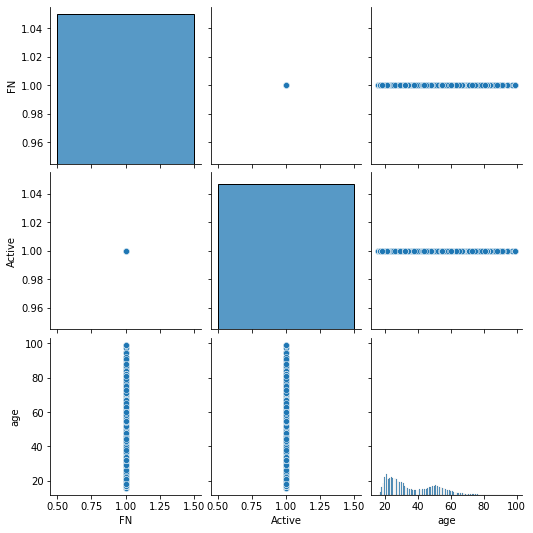

In [ ]:
sns.pairplot(customers)

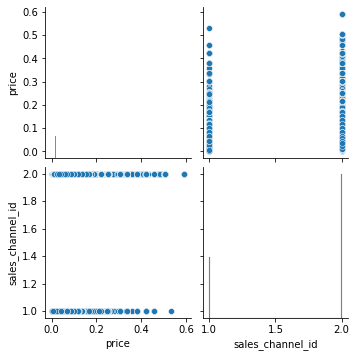

In [ ]:
sns.pairplot(transactions)

### Article 

In [ ]:
plt.rcParams.update({'font.size': 18})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

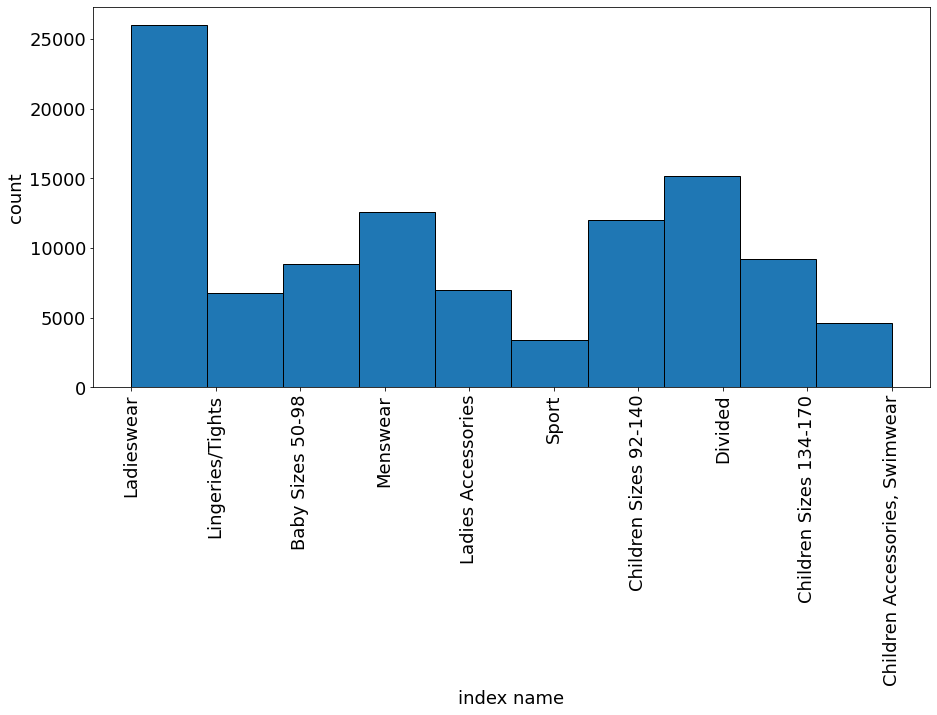

In [ ]:
plt.subplots(figsize=(15, 7))
plt.hist(articles['index_name'], edgecolor = "black")
plt.ylabel('count')
plt.xlabel('index name')
plt.xticks(rotation=90)

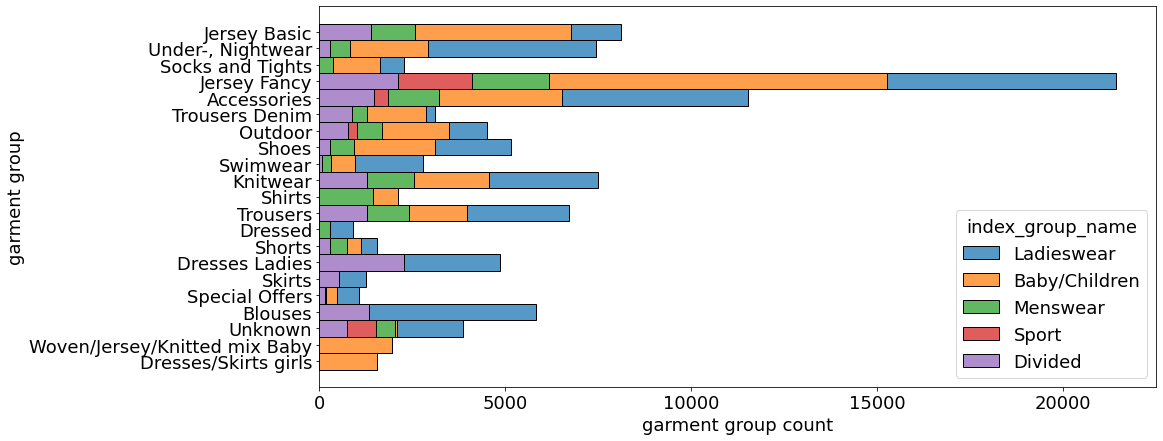

In [ ]:
#Jersey fancy is the most frequent garment, especially for women and children. 
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='garment_group_name',  hue='index_group_name', multiple="stack")
ax.set_xlabel('garment group count', fontsize=18)
ax.set_ylabel('garment group', fontsize=18)
plt.show()

### Customer 

In [ ]:
#One of the postal codes(2c29ae653a9282cce4151bd87643c907644e09541abc28…) has high number(120303) of customer_id 
data_postal = customers.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
data_postal.head()

,postal_code,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,42874,39886,118281,114377,118002
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,109,104,261,261,260
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,90,88,159,159,158
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,55,54,157,156,156
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,42,41,156,156,155


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

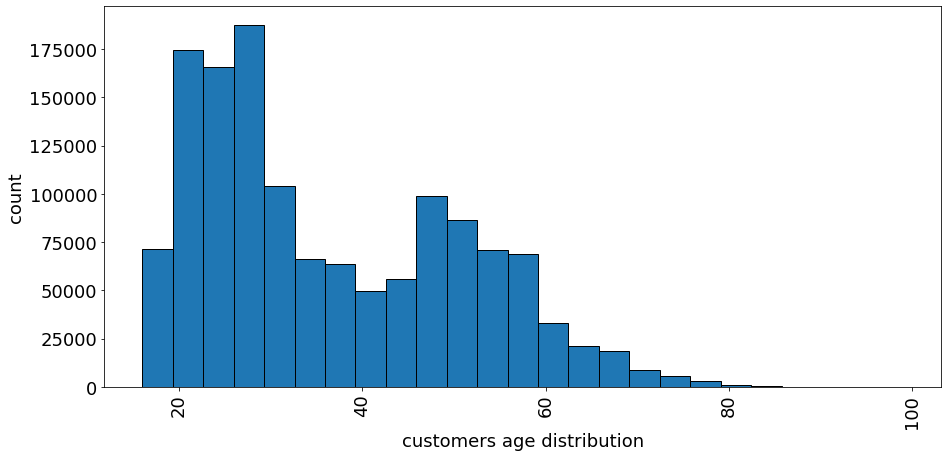

In [ ]:
# The most common age is about 21-23 
plt.subplots(figsize=(15, 7))
plt.hist(customers['age'], bins = 25, edgecolor = "black")
plt.xlabel('customers age distribution')
plt.ylabel('count')
plt.xticks(rotation=90)

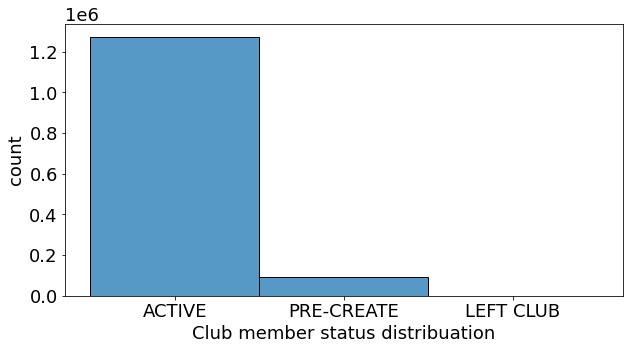

In [ ]:
#Status in H&M club. Almost every customer has an active club status, some of them begin to activate it (pre-create). 
# A tiny part of customers abandoned the club.

f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='club_member_status')
ax.set_xlabel('Club member status distribuation')
plt.ylabel('count')
plt.show()

### Transaction

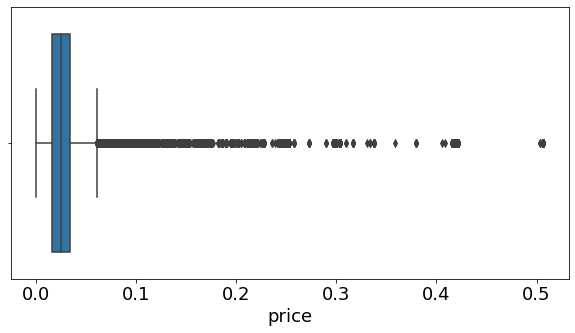

In [ ]:
# outliers for price
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=transactions, x='price')
ax.set_xlabel('price')
plt.show()

### Age bucket 

In [ ]:
customers['age_bucket'] = 'NA'
customers.loc[(customers['age'] >=16) & (customers['age'] <=24), 'age_bucket'] = '16-20'
customers.loc[(customers['age'] >24) & (customers['age'] <=40), 'age_bucket'] = '20-40'
customers.loc[(customers['age'] >40) & (customers['age'] <=60), 'age_bucket'] = '40-60'
customers.loc[(customers['age'] >60) , 'age_bucket'] = '>60'

In [ ]:
transactions.drop(labels = ['sales_channel_id'], inplace = True, axis = 1)
M1 = pd.merge(left = transactions, right = customers , how = 'left', on = 'customer_id')
M2 = pd.merge(left = M1, right = articles[['article_id','prod_name','index_group_name','graphical_appearance_name','index_name','section_name','garment_group_name']], on = 'article_id', how = 'left')
Sales_age_group = M2.groupby(['age_bucket'])['price'].sum().reset_index()

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

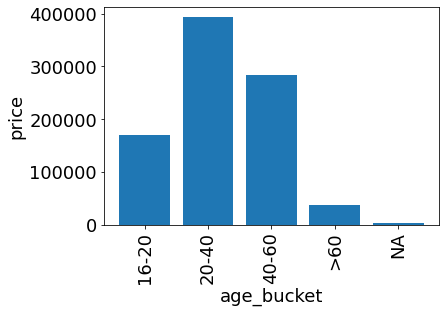

In [ ]:
plt.bar(Sales_age_group['age_bucket'], Sales_age_group['price'])
plt.xlabel('age_bucket')
plt.ylabel('price')
plt.xticks(rotation=90)

### Popular Products Categories

In [ ]:
prod_name = M2['prod_name'].value_counts().reset_index()
prod_name.columns  = ['prod_name','orders']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

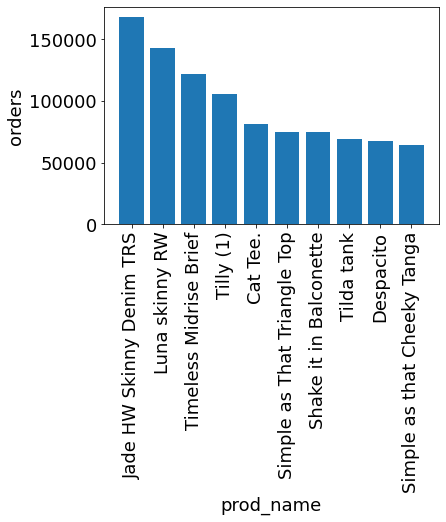

In [ ]:
plt.bar(prod_name['prod_name'].head(10), prod_name['orders'].head(10))
plt.xlabel('prod_name')
plt.ylabel('orders')
plt.xticks(rotation=90)

### Do customers buy the same products again??

In [ ]:
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
transactions = transactions[transactions['t_dat'] >= pd.to_datetime('2020-07-01')]

articles['combined_key'] = articles['index_group_name'] + '_' + articles['index_name'] + '_' + articles['product_type_name']
df = pd.merge(transactions,articles,on='article_id',how='left')

df['product_code'] = df['product_code'].astype(str)
df['num_week'] = df['t_dat'].dt.isocalendar().week
df['product_code'] = df['product_code'].astype(str)

In [ ]:
col1_w2 = ['num_week','customer_id','purchased_set']
col2_w2 = ['num_2wk_before','customer_id','2wk_before_purchased_set']
left_key_w2 = ['num_week', 'customer_id']
right_key_w2 = ['num_2wk_before', 'customer_id']

# col1_w1 = ['num_week','customer_id','purchased_set']
col2_w1 = ['num_1wk_before','customer_id','1wk_before_purchased_set']
left_key_w1 = ['num_week', 'customer_id']
right_key_w1 = ['num_2wk_before', 'customer_id']

# col1_w1 = ['num_week','customer_id','purchased_set']
col2_w3 = ['num_3wk_before','customer_id','3wk_before_purchased_set']
left_key_w3 = ['num_week', 'customer_id']
right_key_w3 = ['num_3wk_before', 'customer_id']

df_new_list = ['num_week','customer_id','purchased_set','1wk_before_purchased_set','2wk_before_purchased_set','3wk_before_purchased_set']
week_loop = ['purchased_set','1wk_before_purchased_set', '2wk_before_purchased_set', '3wk_before_purchased_set']


In [ ]:
## Compare a set of products purchased in any given week with a set of products purchased 1, 2, or 3 weeks ago to see if they contain the SAME products.

def check_customer_purchase(df, agg_key):

    dfnew = df.groupby(['num_week','customer_id'])[[agg_key]].agg({agg_key: lambda x: ','.join(x)}).reset_index().rename(columns={agg_key: 'purchased_set'})
    dfnew['num_2wk_before'] = dfnew['num_week'] + 2
    dfnew['num_1wk_before'] = dfnew['num_week'] + 1
    dfnew['num_3wk_before'] = dfnew['num_week'] + 3

    dfnew = pd.merge(dfnew[col1_w2],dfnew.rename(columns={'purchased_set': '2wk_before_purchased_set'})[col2_w2],left_on=left_key_w2,right_on=right_key_w2,how='left')
    dfnew = pd.merge(dfnew,dfnew.rename(columns={'purchased_set': '1wk_before_purchased_set'})[col2_w1],left_on=left_key_w1,right_on=right_key_w1,how='left')
    dfnew = pd.merge(dfnew,dfnew.rename(columns={'purchased_set': '3wk_before_purchased_set'})[col2_w3],left_on=left_key_w3,right_on=right_key_w3,how='left')
    dfnew = dfnew[df_new_list]
    
    for col in week_loop:
        dfnew[col] = dfnew[col].fillna('')
        dfnew[col] = dfnew[col].str.split(',')
    
    dfnew['2wk_before_purchased_set'] = dfnew['2wk_before_purchased_set'] + dfnew['1wk_before_purchased_set']
    dfnew['3wk_before_purchased_set'] = dfnew['3wk_before_purchased_set'] + dfnew['2wk_before_purchased_set']
    
    for col in ['purchased_set','1wk_before_purchased_set', '2wk_before_purchased_set', '3wk_before_purchased_set']:
        dfnew[col] = dfnew[col].map(set)

    dfnew['is_purchased_same_within_1wk'] = (dfnew['purchased_set'] & dfnew['1wk_before_purchased_set']).astype(int)
    dfnew['is_purchased_same_within_2wk'] = (dfnew['purchased_set'] & dfnew['2wk_before_purchased_set']).astype(int)
    dfnew['is_purchased_same_within_3wk'] = (dfnew['purchased_set'] & dfnew['3wk_before_purchased_set']).astype(int)
    
    df_vis = pd.DataFrame({
        'period': ['Within_1wk', 'Within_2wk', 'Within_3wk'],
        'percentage_of_customer': [len(dfnew[dfnew['is_purchased_same_within_1wk'] == 1]['customer_id'].unique()) / len(dfnew['customer_id'].unique()) * 100,
                  len(dfnew[dfnew['is_purchased_same_within_2wk'] == 1]['customer_id'].unique()) / len(dfnew['customer_id'].unique()) * 100,
                  len(dfnew[dfnew['is_purchased_same_within_3wk'] == 1]['customer_id'].unique()) / len(dfnew['customer_id'].unique()) * 100]
    })
    fig = px.bar(df_vis, x='period', y='percentage_of_customer', fontsize=18)
    fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=20,
        color="Black"
    )
)

    fig.show()
    return dfnew

In [ ]:
dfagg_article = check_customer_purchase(df, 'article_id')

6.643407353238566 6.154185552943195 5.093013422448641


Results - 
* 5.1% of customers will buy the same product in one week
* 6.2% will buy the same product within two weeks
* 6.6% will buy the same product within three weeks


In [ ]:
# Do customers buy different colors and sizes of the same product?
dfagg_prdcd = check_customer_purchase(df, 'product_code')

9.381619559067149 8.480797789003438 6.767806550056889


Results -
* 6.8% of customers will buy the same product code item in one week
* 8.5% will buy the same product code item within two weeks
* 9.4% will buy the same product code item within three weeks


In [ ]:
# Do customers buy the same product type?
dfagg_combined_key = check_customer_purchase(df, 'combined_key')

16.5346755101082 14.338590510118415 10.800260645936191


Results - 
* 10.8% of customers will buy the same combined_key item in one week
* 14.3% will buy the same combined_key item within two weeks
* 16.5% will buy the same combined_key item within three weeks
